## 1. 합성곱 신경망

## 2. 손글씨 숫자 인식을 위한 CNN 구현

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [14]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X /= 255
test_X /= 255

print('train_X shape: ', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

# 원핫 인코딩
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

train_X shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
model = Sequential()

# Conv2D 사용 시, 2차원 데이터를 입력받아 필터 적용
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# DNN 사용할 때, 스칼라 값을 줘야하므로 flatten으로 입력값 1차원 변환
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 64)         

In [11]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=128, epochs=10)

score = model.evaluate(test_X, test_y, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.3455 - accuracy: 0.8917 - val_loss: 0.0787 - val_accuracy: 0.9737
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.1215 - accuracy: 0.9628 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.0398 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0747 - accuracy: 0.9775 - val_loss: 0.0320 - val_accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0317 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0283 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0269 - val_accuracy:

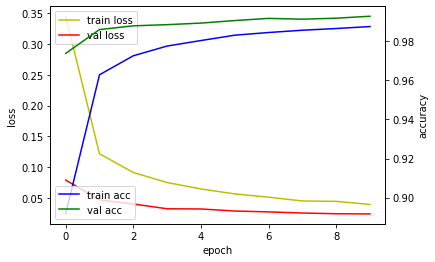

In [12]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

## 3. CNN 알고리즘

### 3.1 LeNet

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import backend as K

class LeNet:
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses, activation='relu'):
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)

        # channels first 이면 shape 변경
        if K.image_data_format() == 'channels_first':
            inputShape = (numChannels, imgRows, imgCols)

        # 첫 번째 conv
        model.add(Conv2D(6, (5, 5), input_shape=inputShape, padding='same'))
        model.add(Activation(activation))
        model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

        # 두 번째 conv
        model.add(Conv2D(16, (5, 5), activation='relu', use_bias=True, padding='same'))
        model.add(Activation(activation))
        model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

        # 첫 번째 FC 계층
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation(activation))

        # 두 번째 FC 계층
        model.add(Dense(84, activation='relu'))

        # 출력층
        model.add(Dense(numClasses, activation='softmax'))

        return model

LeNet_model = LeNet().build(numChannels=1, imgRows=28, imgCols=28, numClasses=10)
LeNet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        2416      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 average_pooling2d_3 (Averag  (None, 7, 7, 16)         0         
 ePooling2D)                                          

### 3.2 AlexNet

### 3.3 VGGNet

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import RandomNormal

# VGGNet ConvNet Configuration E
class VGGNet:
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses, activation='relu'):
        model = Sequential()
        inputShape = (imgRows, imgCols, numChannels)

        # conv 1
        model.add(Conv2D(64, (3, 3), input_shape=inputShape, activation=activation, 
                                     padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
        # conv 2
        model.add(Conv2D(64, (3, 3), activation=activation, padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
        # maxpool
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # conv 3
        model.add(Conv2D(128, (3, 3), activation=activation, padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
        # conv 4
        model.add(Conv2D(128, (3, 3), activation=activation, padding='same', kernel_initializer=RandomNormal(stddev=0.01)))
        # maxpool
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # conv 5 ~ 8
        model.add(Conv2D(256, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(256, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(256, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(256, (3, 3), activation=activation, padding='same'))
        # maxpool
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # conv 9 ~ 12
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        # maxpool
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # conv 13 ~ 16
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        model.add(Conv2D(512, (3, 3), activation=activation, padding='same'))
        # maxpool
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        # 첫 번째 FC 계층
        model.add(Dense(4096, activation=activation))
        # 두 번째 FC 계층
        model.add(Dense(4096, activation=activation))

        # 출력층
        model.add(Dense(numClasses, activation='softmax'))

        return model

vgg_model = VGGNet().build(numChannels=3, imgRows=244, imgCols=244, numClasses=1000)
vgg_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 244, 244, 64)      1792      
                                                                 
 conv2d_81 (Conv2D)          (None, 244, 244, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 122, 122, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 122, 122, 128)     73856     
                                                                 
 conv2d_83 (Conv2D)          (None, 122, 122, 128)     147584    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 61, 61, 128)      0         
 g2D)                                                 

In [32]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19()

In [33]:
weights = vgg.get_weights()
vgg_model.set_weights(weights)

In [37]:
from tensorflow.keras.preprocessing import image
img = image.load_img('cat.jpeg', target_size=(244, 244))
img_data = image.img_to_array(img)

In [38]:
print('before reshape: ', img_data.shape)
import numpy as np
img_data = img_data[np.newaxis, ...]
print('after reshape: ', img_data.shape)

before reshape:  (244, 244, 3)
after reshape:  (1, 244, 244, 3)


In [39]:
pred = vgg_model.predict(img_data)
print(pred.shape)
from tensorflow.keras.applications.vgg19 import decode_predictions
print(decode_predictions(pred))

(1, 1000)
[[('n02124075', 'Egyptian_cat', 0.44403753), ('n02120505', 'grey_fox', 0.31175065), ('n02123045', 'tabby', 0.08311919), ('n02123159', 'tiger_cat', 0.051094394), ('n02119789', 'kit_fox', 0.038127065)]]


### 3.4 GoogLeNet

### 3.5 ResNet

## 4. 케라스의 모델